In [0]:
%%capture
from notebook import notebookapp
server = list(notebookapp.list_running_servers())[0]

if server['hostname'] == 'localhost':
  # Local environment
  %reload_ext autoreload
  %autoreload 2
else:
  # Cloud
  !pip install git+https://github.com/fastai/fastai.git
  !curl https://course.fast.ai/setup/colab | bash

In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

A linear function can be defined as:

> $y = ax + b$

which could be rewritten as:

> $y = a_1 x_1 + a_2 x_2\quad;\quad x_2 = 1$

We create a tensor of rank 2 $(n,2)$, a matrix, for X. A `tensor` is a regular array in Deep Learning. The `rank` is the number of axes or dimensions.

In [4]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1) # The ':' means every value in that axis. 
                       # The '_' at the end of the function name means that function applies in place.
x[:5]

tensor([[-0.8060,  1.0000],
        [ 0.5718,  1.0000],
        [-0.3847,  1.0000],
        [-0.5661,  1.0000],
        [ 0.5404,  1.0000]])

Create another tensor of rank 1 $(1,2)$, a vector, for the coefficients (slope, intersection):

In [5]:
a = tensor(3.,2); a # a1 = 3, a2 = 2

tensor([3., 2.])

So we calculate `y`, adding a bit of noise:

In [0]:
y = x@a + torch.rand(n)

And we plot y against x ($x_1$)

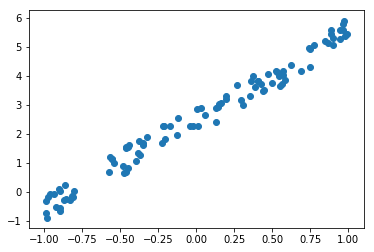

In [7]:
plt.scatter(x[:,0], y);

You want to find **parameters** (that's how PyTorch calls weights) **`a`** such that you minimize the *error* between the points and the line `x@a`. Note that here **`a` is unknown**. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

The `y_hat` is the prediction, while `y` is the actual.

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [10]:
y_hat = x@a
mse(y_hat, y)

tensor(8.7268)

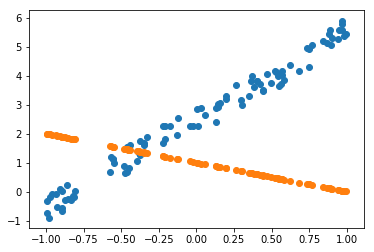

In [11]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [12]:
a = nn.Parameter(a); a           # track the parameter so we can calculate the derivatives automatically

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a                  # predict
    loss = mse(y, y_hat)         # calculate mse
    if t % 10 == 0: print(loss)  # print loss from time to time
    loss.backward()              # calculate the gradient (leave that at a.grad)
    
    with torch.no_grad():
        a.sub_(lr * a.grad)      # update weights in the direction opposite to the gradient (subtraction), so loss decreases
        a.grad.zero_()

In [14]:
lr = 1e-1
for t in range(100): update()

tensor(8.7268, grad_fn=<MeanBackward0>)
tensor(1.3319, grad_fn=<MeanBackward0>)
tensor(0.3240, grad_fn=<MeanBackward0>)
tensor(0.1265, grad_fn=<MeanBackward0>)
tensor(0.0867, grad_fn=<MeanBackward0>)
tensor(0.0787, grad_fn=<MeanBackward0>)
tensor(0.0771, grad_fn=<MeanBackward0>)
tensor(0.0768, grad_fn=<MeanBackward0>)
tensor(0.0767, grad_fn=<MeanBackward0>)
tensor(0.0767, grad_fn=<MeanBackward0>)


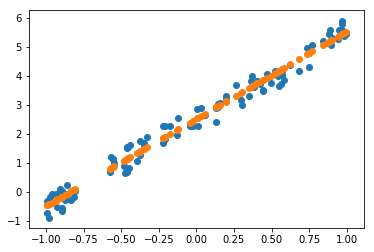

In [15]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [17]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate the loss on the whole dataset on every interaction (imagine we hace a million of images), but we use *mini-batches*. That's what we know as **SGD**

## Vocab

- Learning rate: how much we update the weights
- Epoch: one complete run through all the data (if you use mini-batches one epoch is not one iteration)
- Minibatch
- SGD
- Model / Architecture
- Parameters (coefficients, weights)
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.